In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random, os
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
!unzip -q "/content/drive/MyDrive/number.zip" -d dataset

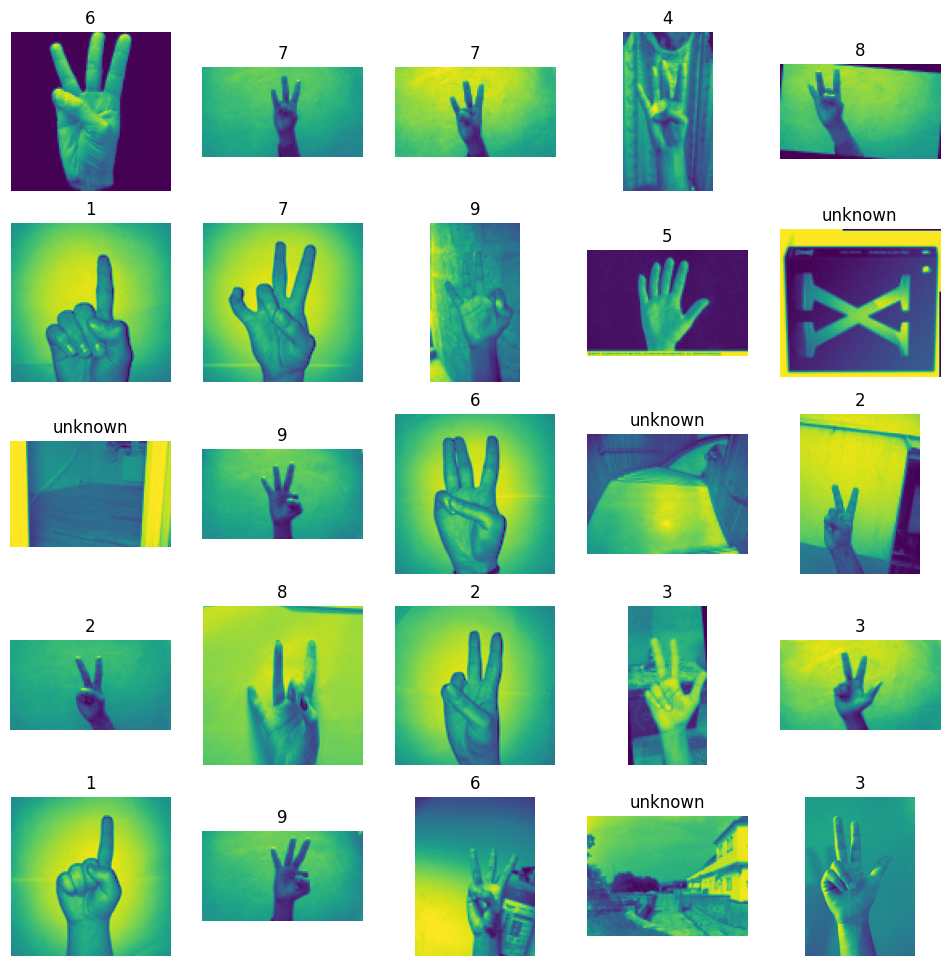

In [ ]:
plt.figure(figsize=(12,12))
root = "dataset/SIgn/"
for i in range(25):
  random_folder = random.choice(os.listdir(root))
  filename = random.choice(os.listdir(f"{root}/{random_folder}"))
  path = f"{root}/{random_folder}/{filename}"
  img = mpimg.imread(path)
  plt.subplot(5,5,i+1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(random_folder)
plt.show()

In [ ]:
img_height, img_width = 200, 200
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 "dataset/SIgn/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16500 files belonging to 11 classes.
Using 13200 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "dataset/SIgn/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16500 files belonging to 11 classes.
Using 3300 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']


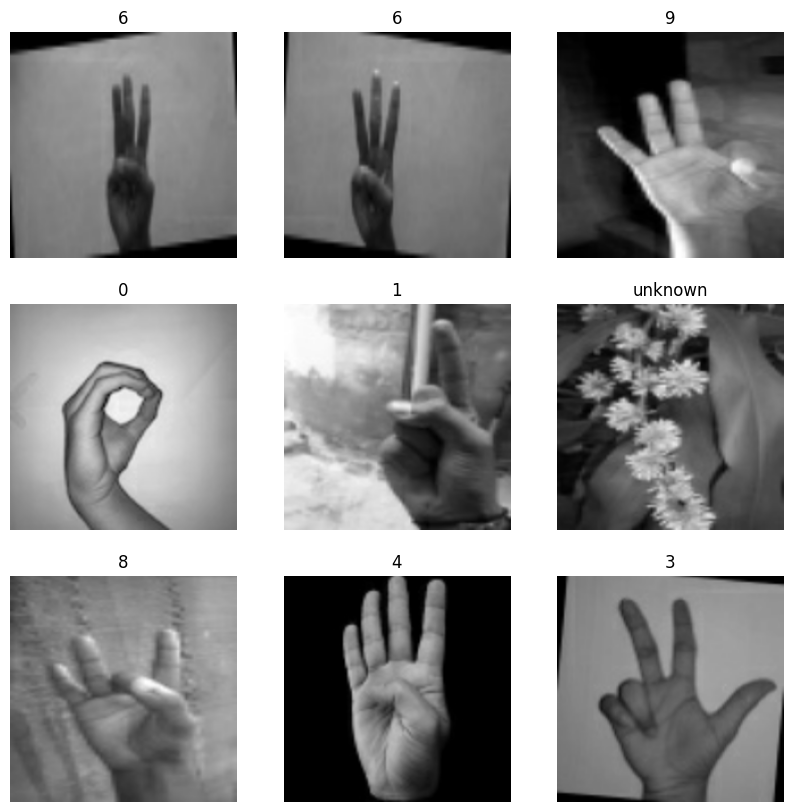

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
     tf.keras.layers.Conv2D(16, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(num_classes)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
training = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
413/413 [==============================] - 17s 38ms/step - loss: 1.3271 - accuracy: 0.5717 - val_loss: 0.7865 - val_accuracy: 0.7539
Epoch 2/20
413/413 [==============================] - 17s 40ms/step - loss: 0.4101 - accuracy: 0.8691 - val_loss: 0.5966 - val_accuracy: 0.8242
Epoch 3/20
413/413 [==============================] - 19s 46ms/step - loss: 0.1485 - accuracy: 0.9526 - val_loss: 0.4707 - val_accuracy: 0.8779
Epoch 4/20
413/413 [==============================] - 30s 71ms/step - loss: 0.0715 - accuracy: 0.9778 - val_loss: 0.5767 - val_accuracy: 0.8888
Epoch 5/20
413/413 [==============================] - 16s 39ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.6438 - val_accuracy: 0.8682
Epoch 6/20
413/413 [==============================] - 16s 37ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.5934 - val_accuracy: 0.8891
Epoch 7/20
413/413 [==============================] - 17s 42ms/step - loss: 0.0416 - accuracy: 0.9861 - val_loss: 0.6444 - val_accuracy:

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

<Axes: >

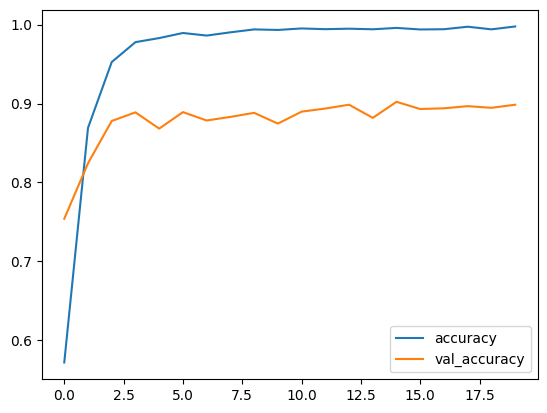

In [ ]:
pd.DataFrame(training.history)[["accuracy", "val_accuracy"]].plot()